# Minimal example
This notebook contains a small example on how to run In Situ Sequencing SEGmentation (ISSSEGG => IS3G).
We need the following packages:
    - numpy
    - pandas
    - scikit-learn
    - scipy
    - torch
    - tqdm
    - matplotlib
    - seaborn

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from is3g import is3g

First let's load some data from the file `data.csv` using `pandas`:

In [2]:
df = pd.read_csv("data.csv")
df.head(5)

,X,Y,Gene,Cell type
0,24.336593,63.595161,Gene 1,Type 1
1,27.955230,75.975694,Gene 1,Type 1
2,26.048297,78.880727,Gene 1,Type 1
3,20.039427,96.890211,Gene 1,Type 1
4,18.062304,101.708686,Gene 1,Type 1


Let's plot the data using `seaborn`.

<AxesSubplot:xlabel='X', ylabel='Y'>

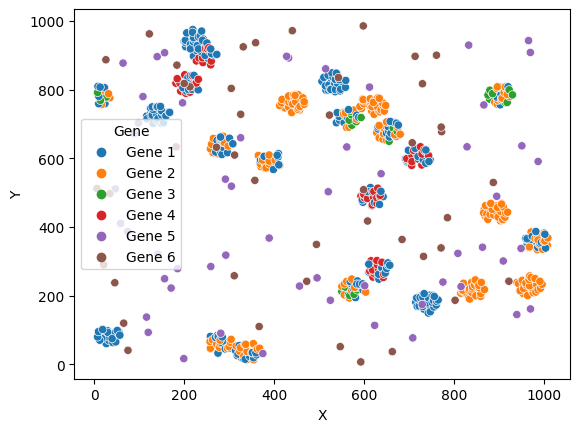

In [3]:
sns.scatterplot(df, x='X', y='Y', hue='Gene')

From the data we can see that the radius of a cell is approximately 25 pixels. 
We will now try to segment the cells using `is3g`.

In [9]:
cell_labels = is3g(df, x="X", y="Y", genes="Gene", radius=25.0)
df["Cell labels"] = pd.Categorical(cell_labels)

Training on device: cpu


  0%|          | 0/500 [00:00<?, ?it/s]

Stopping early at epoch 104 with loss 0.3137


Let's plot the segmented cells and genes

Text(0.5, 1.0, 'Segmentation')

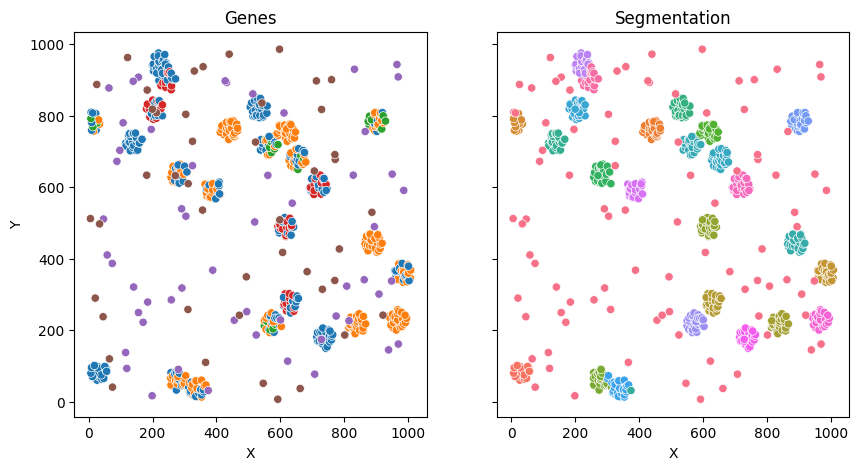

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10, 5))
sns.scatterplot(df, x="X", y="Y", hue="Gene", ax=axs[0], legend=False)
sns.scatterplot(df, x="X", y="Y", hue="Cell labels", ax=axs[1], legend=False)

axs[0].set_title("Genes")
axs[1].set_title("Segmentation")

The segmentation looks pretty OK... 

We will now run `is3g` with a too large cell radius.

Training on device: cpu


  0%|          | 0/500 [00:00<?, ?it/s]

Stopping early at epoch 101 with loss 0.2512


Text(0.5, 1.0, 'Segmentation')

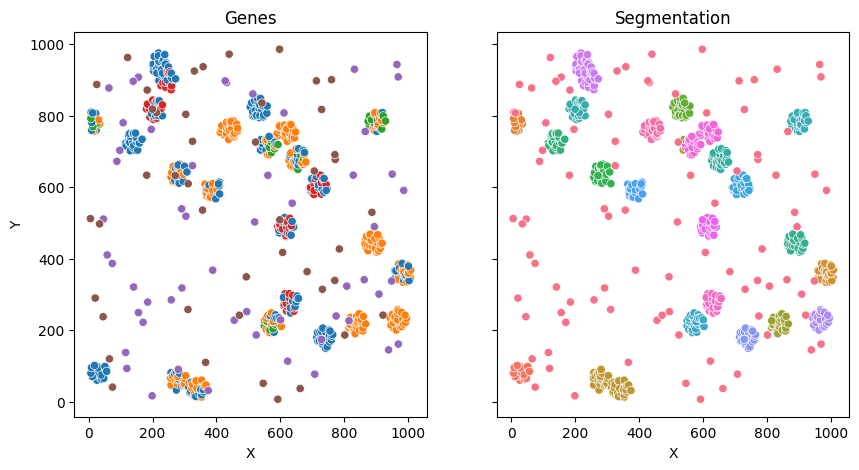

In [6]:
cell_labels = is3g(df, x="X", y="Y", genes="Gene", radius=50.0)
df["Cell labels"] = pd.Categorical(cell_labels)


fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10, 5))
sns.scatterplot(df, x="X", y="Y", hue="Gene", ax=axs[0], legend=False)
sns.scatterplot(df, x="X", y="Y", hue="Cell labels", ax=axs[1], legend=False)

axs[0].set_title("Genes")
axs[1].set_title("Segmentation")

We see that some cells have been merged. We can improve the segmentation by also adding the location of cell nuclei.

For know, let's say we know the location of two nuclei (for example found using Cellpose or Stardist):

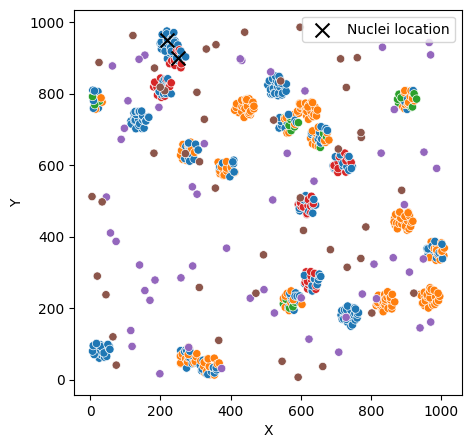

In [7]:
import numpy as np

nuclei_location = np.array(
    [
        [250,900], 
        [220,950]
    ]
)


fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(5, 5))
sns.scatterplot(df, x="X", y="Y", hue="Gene", ax=ax, legend=False)
plt.scatter(nuclei_location[:,0], nuclei_location[:,1], s=100, color='black', marker='x', label='Nuclei location')
plt.legend()


Let's run the segmentation again with nuclei information

Training on device: cpu


  0%|          | 0/500 [00:00<?, ?it/s]

Stopping early at epoch 101 with loss 0.2512


Text(0.5, 1.0, 'Segmentation')

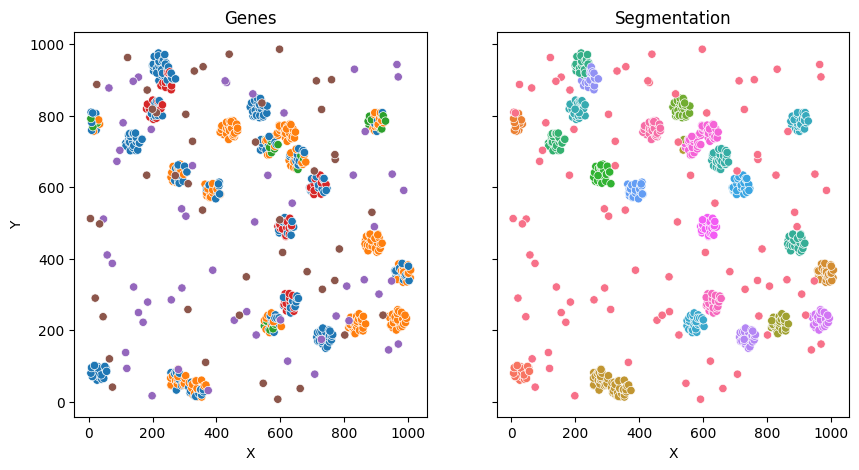

In [8]:
cell_labels = is3g(df, x="X", y="Y", genes="Gene", radius=50.0, nuclei_locations=nuclei_location)
df["Cell labels"] = pd.Categorical(cell_labels)


fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10, 5))
sns.scatterplot(df, x="X", y="Y", hue="Gene", ax=axs[0], legend=False)
sns.scatterplot(df, x="X", y="Y", hue="Cell labels", ax=axs[1], legend=False)

axs[0].set_title("Genes")
axs[1].set_title("Segmentation")

Since we provided additional nuclei information, the model managed to separated two cells that previously were merged. 